In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition 
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

In [5]:
df = pd.read_csv(r"C:\Users\zhaoe\OneDrive\Documents\ratings.csv")

table = pd.pivot_table(df, values='rating', columns=['movieId'], index=['userId'])
table = table.fillna(0)

sliced_table = table.head(5)
sliced_table = sliced_table.append(table.tail(5))
print(sliced_table)

# The complete dataframe has 610 rows so I've printed just the first and last 5 rows instead.

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0   

movieId  9       10       ...    193565  193567  193571  193573  193579  \
userId                  

In [7]:
transposed_t = table.T
X_scaled = transposed_t.apply(lambda x: x-x.mean())

sliced = X_scaled.head(5)
sliced = sliced.append(X_scaled.tail(5))
print(sliced)

# Transposed the matrix above so that the rows refer to movies and columns refer to users. Mean centered the data as well. Once again I only printed the first and last 5 rows to show instead of all 610 rows.

userId        1         2        3        4         5         6         7    \
movieId                                                                       
1        3.895825 -0.011775 -0.00977 -0.07898  3.983546 -0.112814  4.449506   
2       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  3.887186 -0.050494   
3        3.895825 -0.011775 -0.00977 -0.07898 -0.016454  4.887186 -0.050494   
4       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  2.887186 -0.050494   
5       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  4.887186 -0.050494   
193581  -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   
193583  -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   
193585  -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   
193587  -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   
193609  -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   

userId        8         9         10     ...       

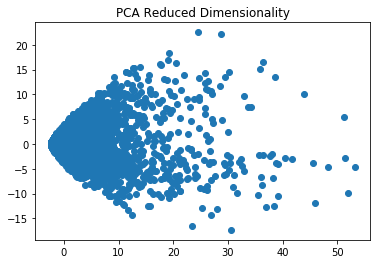

In [8]:
pca = decomposition.PCA(n_components=2) 
pca.fit(X_scaled) 
X_trans = pca.transform(X_scaled)
plt.scatter(X_trans[:,0],X_trans[:,1])
plt.title("PCA Reduced Dimensionality")
plt.show()

# Applied principle component analysis with number of components k = 2 to reduce the dimensionality of the components.

In [9]:
var = pca.explained_variance_ratio_
print(var)

# 17.620942% of the variance is explained by the first component and 4.189505% of the variance is explained by the second.
# The difference between them is observable in the plot. 

[0.17620942 0.04189505]


In [10]:
i = 0
while i < 610:
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_scaled)
    var = pca.explained_variance_ratio_
    if sum(var) >= 0.8:
        print(i)
        break
    i = i + 1
    
# 154 principle components are needed to to explain 80% of the variance of the data.

154


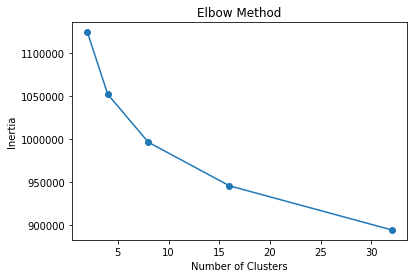

In [11]:
k = [2, 4, 8, 16, 32]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    a = kmeans.fit(transposed_t)
    inertia.append(a.inertia_)
plt.plot(k, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# I'm applying k-means here to measure the inertia for each value of k.
# The most appropriate choice for k is 8 because the point of the elbow method is to minimize the number of clusters and inertia and to do this we have to identify the best elbow point.
# The movies clustered together likely have similar ratings. 

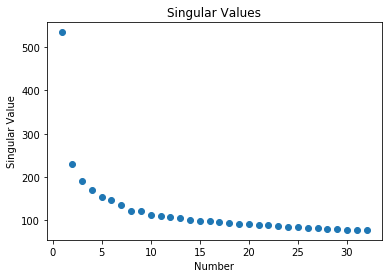

In [12]:
svd = TruncatedSVD(n_components = 32)
y = svd.fit(transposed_t)
plt.scatter(range(1, 33), y.singular_values_)
plt.title("Singular Values")
plt.xlabel("Number")
plt.ylabel("Singular Value")
plt.show()

# Apply singular value decomposition with k = 32.

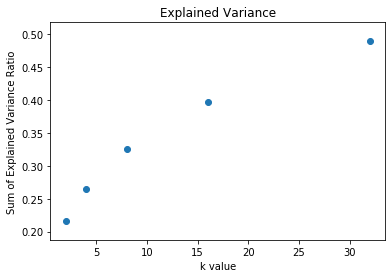

In [13]:
k = [2, 4, 8, 16, 32]
sum_evr = []
for i in k: 
    svd = TruncatedSVD(n_components = i)
    a = svd.fit(transposed_t)
    sum_evr.append(sum(a.explained_variance_ratio_))
plt.scatter(k, sum_evr)
plt.title("Explained Variance")
plt.xlabel("k value")
plt.ylabel("Sum of Explained Variance Ratio")
plt.show()

# The explained variance graph shows that k = 8 is that ideal value because there's an elbow forming at around k = 8 and also it has a high amount of explained variance and a low amount of clusters and it's the inverse compared to the inertia values above. This supports my choice of k = 8.

In [15]:
svd = TruncatedSVD(n_components = 2)
arr = svd.fit_transform(transposed_t)
print(arr)

# Applying singular value decomposition with k = 2 and transforming the data.

[[ 3.76498272e+01 -6.38059341e+00]
 [ 2.05961933e+01 -4.76920815e-01]
 [ 8.50418216e+00 -5.71493070e+00]
 ...
 [ 3.45682112e-02  1.38164599e-01]
 [ 3.45682112e-02  1.38164599e-01]
 [ 1.45217566e-01  2.94218526e-01]]


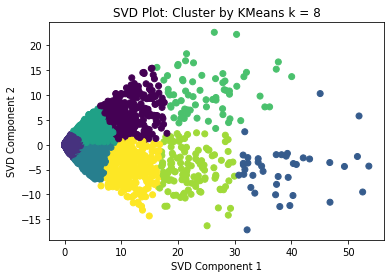

In [16]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(arr)
y_means = kmeans.predict(arr)
plt.scatter(arr[:,0], arr[:,1], c=y_means)
plt.title("SVD Plot: Cluster by KMeans k = 8")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

# I plotted the results with k = 2 and colored the movies by the cluster memberships found above.
# The clusters are close together and show very similar values. k = 8 is a good choice because the points in a similar area are clustered together. 